# Wave Picking route optimization

In [1]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
from ast import literal_eval
import itertools
from IPython.display import Image

x : aisle  
y : row  
x1, y1: start point  
y2, y2: end point  
ymax : n rows

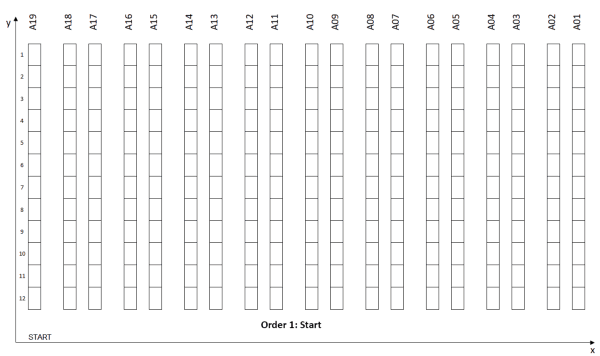

In [2]:
Image(filename='supply_chain/wms/wp.gif') 

### Functions

Calculate Picker Route Distance between two locations

In [34]:
def dist(x1, y1, x2, y2):

    dx = abs(x2-x1)
    dy = abs(y2-y1)
    
    if x1 != x2:
        dy_down = y1 + y2   
        dy_up = (ymax-y1) + (ymax-y2)
        dy = min(dy_down, dy_up)    
    
    d = dx + dy

    return d

Find closest next location 

In [35]:
def next_location(start_loc, locs):

    dists = [dist(start_loc, loc) for loc in locs]
    dist = min(dists)
    
    idx = candidates.index(dist)
    next_loc = dists[idx] 
    dists.remove(next_loc)
    
    return dists, start_loc, next_loc, dist

Calculate total distance to cover for a list of locations

In [36]:
def create_route(origin_loc, locs):

    tot_dist = 0
    route = []
    start_loc = origin_loc
    route.append(start_loc)
    
    while len(dists) > 0: 
        dists, start_loc, next_loc, dist = next_location(start_loc, locs)
        start_loc = next_loc
        route.append(start_loc)
        tot_dist += dist 

    tot_dist += dist(start_loc, origin_loc)
    route.append(origin_loc)
    
    return dist, route

Mapping orders by wave number 

In [37]:
def orderlines_mapping(orderlines, orders_number):

    orderlines = orderlines.sort_values(by='TimeStamp', ascending = True)
    
    uon = orderlines['OrderNumber'].unique()
    n_uon = len(uon)
    orders_dict = dict(zip(uon, [i for i in range(1, n_uon)]))
    orderlines['OrderID'] = orderlines['OrderNumber'].map(orders_dict)

    # Grouping Orders by Wave of orders_number 
    orderlines['WaveID'] = (orderlines['OrderID']%orders_number == 0).shift(1).fillna(0).cumsum()
    
    nwaves = orderlines['WaveID'].max() + 1

    return orderlines, nwaves

Getting storage locations to cover for a wave of orders

In [38]:
def get_locations(orderlines, wave_id):

    df_wid = orderlines[orderlines.WaveID == wave_id]
    # Create coordinates listing
    locs = list(df_wid['Coord'].apply(lambda t: literal_eval(t)).values)
    locs.sort()
    
    locs = list(k for k,_ in itertools.groupby(locs))    

    return locs

In [41]:
def calculate(y_low, y_high, orders_number, orderlines, wids, dists, routes, orders_numbers):

    distance_route = 0 
    orderlines, waves_number = orderlines_mapping(orderlines, orders_per_wave)

    for wave_id in range(waves_number):
        locs = get_locations(orderlines, wave_id)
        wave_dist, route = create_route(Loc_orn, list_locs, y_low, y_high)
        dist_route = dis_route + wave_dist

    wids.append(wave_id)
    dists.append(wave_dist)
    routes.append(routes)
    orders_numbers.append(orders_per_wave)

    return wids, dists, routes, orders_numbers, dist_route

### Testing

In [ ]:
# Import dataframe with orderlines
orderlines = import_dataset('df_mois12-2018-P.xlsx')

In [ ]:
# Parameters
y_low, y_high = 5.5, 50 
loc_origin = [0, y_low] 
orders_per_wave = 3  

Test several values of orders per wave

In [ ]:
wids, dists, routes, orders_numbers = [], [], [], []

for orders_number in range(1, 10):
    wids, dists, routes, orders_numbers, dist_route = calculate(y_low, y_high, orders_number, orderlines, wids, dists, routes, orders_numbers)
    print("Total distance covered for {} orders/wave: {:,} m".format(orders_number, distance_route))

df_res = pd.DataFrame({'Wave_Number': wids, 'Distance_Route': dists, 'Routes': routes, 'OrderPerWave': orders_numbers})
df_results.head()

### Credits & Links

https://medium.com/@s.saci95/optimizing-warehouse-operations-with-python-part-1-83d02d001845